### Problem Statement:

To scrap tweets regarding various hashtags from Twitter using tweepy library and performing Sentiment Analysis of the tweets using Vader model.

### Import Required Libraries:

In [85]:
import tweepy
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [58]:
# Obtain consumer & access keys from Twitter 
consumer_key=''
consumer_secret=''

access_token=''
access_secret=''

authenticate=tweepy.OAuthHandler(consumer_key,consumer_secret)
authenticate.set_access_token(access_token,access_secret)

#Authenticating the Twitter Api in order to extract data
twitter_api=tweepy.API(authenticate)

### Obtaining tweets with respect to various hashtags:

In [59]:
# Creating a function that extracts a number of tweets as per the mentioned hashtag

df_main=pd.DataFrame(columns=['created_at','source','text'])

def user_name(name):
    user_name=name.split()
    # Ensuring that the retweets are filtered out and the tweets are in english language
    tweets=twitter_api.search('{} -filter:retweets'.format(user_name[0]),count=100,lang='en')
    
    global df_main
    
    tweets_df=pd.DataFrame()
    for tw in tweets:
        if (tw.retweeted==False) and ('RT @' not in tw.text):

            temp={
                "created_at":tw.created_at,
                "text":tw.text,
                "source":tw.source
            }
            
        tweets_df=tweets_df.append(temp,ignore_index=True)
    
    df_main=df_main.append(tweets_df)   

In [60]:
#1
user_name("#Olympics")

In [61]:
#2
user_name("#covid19")

In [62]:
#3
user_name("#NLP")

In [63]:
#4
user_name("#Bollywood")

##### Extracted tweets with regards to 5 different hashtags.

In [64]:
df_main.head()

,created_at,source,text
0,2021-07-26 15:16:34,Twitter Web App,Youngest Athlete Competing in the #Olympics? A...
1,2021-07-26 15:16:33,Twitter for iPhone,🇧🇷 Vs 🇦🇷 going on…. No no not football 😁. It’s...
2,2021-07-26 15:16:33,Twitter for Android,NOT THEM PLAYING GOOD GIRLS BY 5SOS💀💀\n\nMy 20...
3,2021-07-26 15:16:32,Twitter Web App,Join our free and exclusive active #Olympics d...
4,2021-07-26 15:16:32,Twitter for iPhone,Watching highlights from the #Olympics yesterd...


In [65]:
df_main.shape

(400, 3)

##### The dataset consists of  400 tweets.

### Sentiment Analysis using Vader Model:

In [66]:
sentence=df_main['text']
sentence[:10]

0    Youngest Athlete Competing in the #Olympics? A...
1    🇧🇷 Vs 🇦🇷 going on…. No no not football 😁. It’s...
2    NOT THEM PLAYING GOOD GIRLS BY 5SOS💀💀\n\nMy 20...
3    Join our free and exclusive active #Olympics d...
4    Watching highlights from the #Olympics yesterd...
5    Djokovic, Osaka cruise at Olympics as women’s ...
6    ICYMI: Here is a really cool 5-minute excerpt ...
7    I’m convinced they just asked a couple of rand...
8    #Tokyo2020 #Olympics #Kosovo #Serbia how’s lif...
9    @Sportsnet\n\n"Jessica Klimkait won bronze to ...
Name: text, dtype: object

In [67]:
#Initialising the Analyzer which calculates the compound score of each tweet 
sentiment_analyzer=SentimentIntensityAnalyzer()
df_main['compound_score']=df_main['text'].apply(lambda a: sentiment_analyzer.polarity_scores(a)['compound'])

In [68]:
df_main=df_main.reset_index().drop(columns=['index'])
df_main.head()

,created_at,source,text,compound_score
0,2021-07-26 15:16:34,Twitter Web App,Youngest Athlete Competing in the #Olympics? A...,0.0000
1,2021-07-26 15:16:33,Twitter for iPhone,🇧🇷 Vs 🇦🇷 going on…. No no not football 😁. It’s...,-0.5267
2,2021-07-26 15:16:33,Twitter for Android,NOT THEM PLAYING GOOD GIRLS BY 5SOS💀💀\n\nMy 20...,0.3647
3,2021-07-26 15:16:32,Twitter Web App,Join our free and exclusive active #Olympics d...,0.9312
4,2021-07-26 15:16:32,Twitter for iPhone,Watching highlights from the #Olympics yesterd...,0.6697


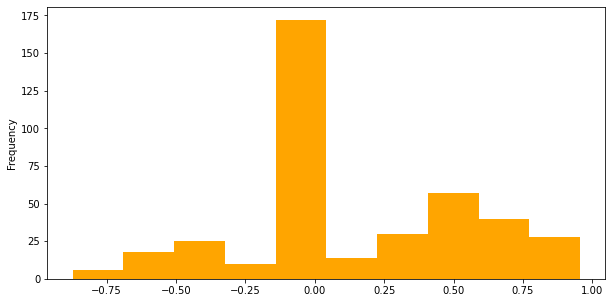

In [78]:
plt.figure(figsize=(10,5))
df_main['compound_score'].plot(kind='hist',color='orange')
plt.show()

##### As per the histogram above most of the tweets have a neutral sentiment as there is a very high frequency at the compound score 0 .

In [81]:
# Sentiment of the tweets with respect to the compound score by setting a threshold

tweet_sentiment=[]
for i in df_main['compound_score']:
    if i==0.0:
        tweet_sentiment.append("Neutral")
    elif i>0.0:
        tweet_sentiment.append("Positive")
    else:
        tweet_sentiment.append("Negative")
df_main['sentiment']=tweet_sentiment
df_main.head()

,created_at,source,text,compound_score,sentiment
0,2021-07-26 15:16:34,Twitter Web App,Youngest Athlete Competing in the #Olympics? A...,0.0000,Neutral
1,2021-07-26 15:16:33,Twitter for iPhone,🇧🇷 Vs 🇦🇷 going on…. No no not football 😁. It’s...,-0.5267,Negative
2,2021-07-26 15:16:33,Twitter for Android,NOT THEM PLAYING GOOD GIRLS BY 5SOS💀💀\n\nMy 20...,0.3647,Positive
3,2021-07-26 15:16:32,Twitter Web App,Join our free and exclusive active #Olympics d...,0.9312,Positive
4,2021-07-26 15:16:32,Twitter for iPhone,Watching highlights from the #Olympics yesterd...,0.6697,Positive


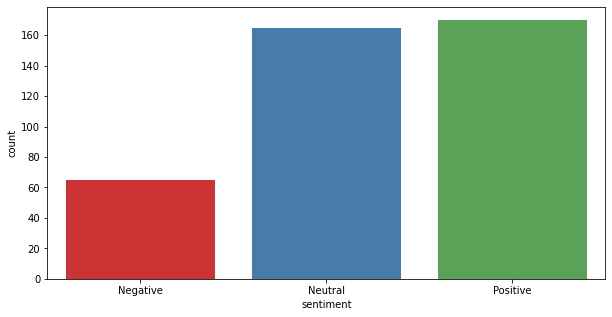

In [100]:
plt.figure(figsize=(10,5))
sns.countplot(df_main['sentiment'],palette='Set1',order=['Negative','Neutral','Positive'])
plt.show()

##### As per the plot above, maximum of the tweets potrrayed positive or neutral sentiment whereas the tweets that portrayed negative sentiment are less.

### Conclusion:

- The tweets were scrapped using tweepy library considering #Olympics, #covid19, #NLP, #Bollywood hashtags
- Using the Vader model, the compound score of each tweet was calculated considering the lexicons that each word within each tweet holds.
- Setting a threshold the sentiment of each tweet was evaluated as Positive, Negative or Neutral sentiment.